# LOGISTIC REGRESSION

1. What is Logistic Regression, and how does it differ from Linear
Regression?

Logistic regression predicts a categorical outcome (like yes/no) by estimating the probability of an event, whereas linear regression predicts a continuous outcome (like price or temperature) using a linear relationship between variables. The key difference is that logistic regression uses a sigmoidal (S-shaped) function to constrain its output between 0 and 1, making it suitable for classification, while linear regression uses a simple linear equation to forecast any real number value

2. Explain the role of the Sigmoid function in Logistic Regression.

The sigmoid function in logistic regression transforms the output of a linear equation into a probability between 0 and 1, allowing the model to predict the likelihood of a binary event. It "squashes" any real-valued input into this confined range, creating an S-shaped curve that is essential for binary classification by enabling a clear threshold for decision-making and facilitating training with gradient descent.

3. What is Regularization in Logistic Regression and why is it needed?

Regularization in Logistic Regression is a technique that prevents overfitting by adding a penalty term to the model's cost function, which discourages large coefficient values for features. It is needed because logistic regression, especially with many features, can become overly complex and fit the noise in training data, leading to poor performance on new, unseen data.

4. What are some common evaluation metrics for classification models, and
why are they important?

Common classification metrics like Accuracy, Precision, Recall, F1-Score, and AUC-ROC evaluate how well a model assigns items to categories, with Accuracy suitable for balanced datasets and Precision, Recall, and F1-Score offering deeper insights into false positives/negatives, especially for imbalanced data, while AUC-ROC shows performance across all thresholds. They are important because they ensure the model meets specific problem goals, such as minimizing costly misdiagnoses in medical tests, by providing a quantitative measure of performance beyond simple correct/incorrect predictions.

5.



In [1]:
#5. Write a Python program that loads a CSV file into a Pandas DataFrame,
#splits into train/test sets, trains a Logistic Regression model, and prints its accuracy.
#(Use Dataset from sklearn package)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris


iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target




X = df.drop('target', axis=1)
y = df['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Logistic Regression Model Accuracy: {accuracy:.4f}")

Logistic Regression Model Accuracy: 1.0000


In [2]:
#6. Write a Python program to train a Logistic Regression model using L2
#regularization (Ridge) and print the model coefficients and accuracy.
#(Use Dataset from sklearn package)

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


iris = load_iris()
X = iris.data
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


print("Model Coefficients (per feature):")
for i, coef in enumerate(model.coef_[0]):
    print(f"Feature {i}: {coef:.4f}")


print(f"Model Intercept: {model.intercept_[0]:.4f}")

Model Accuracy: 0.9778
Model Coefficients (per feature):
Feature 0: 0.3648
Feature 1: 1.3550
Feature 2: -2.0963
Feature 3: -0.9215
Model Intercept: 0.2363


In [3]:
#7. Write a Python program to train a Logistic Regression model for multiclass
#classification using multi_class='ovr' and print the classification report.
#(Use Dataset from sklearn package)

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


iris = load_iris()
X = iris.data
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=200, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [4]:
#8. Write a Python program to apply GridSearchCV to tune C and penalty
#hyperparameters for Logistic Regression and print the best parameters and validation
#accuracy.
#(Use Dataset from sklearn package)

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler


iris = load_iris()
X, y = iris.data, iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(solver='liblinear', multi_class='auto', max_iter=1000)


param_grid = {
    'C': np.logspace(-3, 3, 7),
    'penalty': ['l1', 'l2']
}


grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)


grid_search.fit(X_train_scaled, y_train)


print(f"Best parameters: {grid_search.best_params_}")


print(f"Best validation accuracy: {grid_search.best_score_:.4f}")


best_logreg_model = grid_search.best_estimator_
test_accuracy = best_logreg_model.score(X_test_scaled, y_test)
print(f"Test set accuracy with best parameters: {test_accuracy:.4f}")

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best parameters: {'C': np.float64(100.0), 'penalty': 'l1'}
Best validation accuracy: 0.9429
Test set accuracy with best parameters: 1.0000


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [5]:
#9. Write a Python program to standardize the features before training Logistic
#Regression and compare the model's accuracy with and without scaling.
#(Use Dataset from sklearn package)

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


iris = load_iris()
X = iris.data
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print("--- Model without Feature Scaling ---")

model_no_scale = LogisticRegression(max_iter=200, random_state=42)
model_no_scale.fit(X_train, y_train)


y_pred_no_scale = model_no_scale.predict(X_test)
accuracy_no_scale = accuracy_score(y_test, y_pred_no_scale)
print(f"Accuracy without scaling: {accuracy_no_scale:.4f}")


print("\n--- Model with Feature Scaling (StandardScaler) ---")

scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model_scaled = LogisticRegression(max_iter=200, random_state=42)
model_scaled.fit(X_train_scaled, y_train)


y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy with scaling: {accuracy_scaled:.4f}")


print(f"\nComparison: Accuracy with scaling ({accuracy_scaled:.4f}) vs. without scaling ({accuracy_no_scale:.4f})")

--- Model without Feature Scaling ---
Accuracy without scaling: 1.0000

--- Model with Feature Scaling (StandardScaler) ---
Accuracy with scaling: 1.0000

Comparison: Accuracy with scaling (1.0000) vs. without scaling (1.0000)


Original class distribution:
target
0    1892
1     108
Name: count, dtype: int64
--------------------------------------------------
Option A: Training with balanced class weights
Evaluation with class_weight='balanced':
              precision    recall  f1-score   support

           0       0.98      0.72      0.83       568
           1       0.13      0.75      0.23        32

    accuracy                           0.72       600
   macro avg       0.56      0.74      0.53       600
weighted avg       0.94      0.72      0.80       600

--------------------------------------------------
Option B: Training with SMOTE oversampling
Class distribution after SMOTE: Counter({np.int64(0): 1324, np.int64(1): 1324})
Evaluation with SMOTE oversampling:
              precision    recall  f1-score   support

           0       0.97      0.75      0.85       568
           1       0.13      0.66      0.22        32

    accuracy                           0.75       600
   macro avg       0.55 

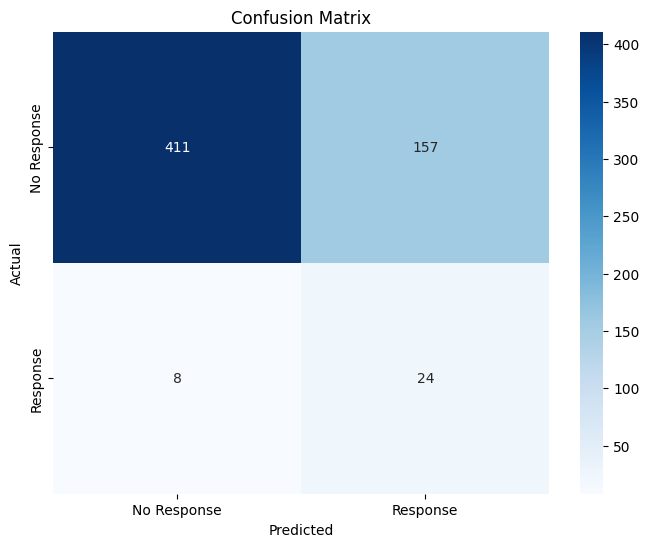

AUC-ROC Score: 0.7924

--- Decile Analysis (average response rate by decile) ---
decile
9    0.166667
8    0.100000
7    0.133333
6    0.083333
5    0.033333
4    0.000000
3    0.000000
2    0.000000
1    0.000000
0    0.016667
Name: actual, dtype: float64


In [6]:
#10. Imagine you are working at an e-commerce company that wants to
#predict which customers will respond to a marketing campaign. Given an imbalanced
#dataset (only 5% of customers respond), describe the approach you’d take to build a
#Logistic Regression model — including data handling, feature scaling, balancing
#classes, hyperparameter tuning, and evaluating the model for this real-world business
#use case.

#1.Data generation to simulate the imbalanced dataset (5% responders).
#2.Data handling, including a stratified train-test split.
#3.Feature scaling using StandardScaler.
#4.Class balancing using two methods: adjusting class weights (often preferred for Logistic Regression) and using SMOTE for oversampling.
#5.Hyperparameter tuning with GridSearchCV and stratified cross-validation.
#6.Model evaluation using a variety of appropriate metrics for imbalanced data, like precision, recall, and the F1-score.
#7.Visualizations to interpret the model's performance.


import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Data handling and preparation ---

# Generate a synthetic imbalanced dataset to simulate the e-commerce scenario.
# 'weights'=[0.95, 0.05] creates a dataset with 95% majority class (non-responders)
# and 5% minority class (responders).
from sklearn.datasets import make_classification
X, y = make_classification(
    n_samples=2000,
    n_features=10,
    n_informative=5,
    n_redundant=2,
    n_classes=2,
    weights=[0.95, 0.05],
    random_state=42
)

# Create a DataFrame for better handling
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['target'] = y

print("Original class distribution:")
print(df['target'].value_counts())
print("-" * 50)

# Stratified split to ensure the train and test sets have the same class distribution.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --- 2. Feature scaling ---

# Standardize the features. Fit on training data only to prevent data leakage.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 3. Balancing the classes ---

# Option A: Adjust class weights in the Logistic Regression model (often best for LR)
print("Option A: Training with balanced class weights")
# The 'balanced' setting automatically adjusts weights inversely proportional
# to class frequencies.
lr_balanced = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)
lr_balanced.fit(X_train_scaled, y_train)
y_pred_balanced = lr_balanced.predict(X_test_scaled)
print("Evaluation with class_weight='balanced':")
print(classification_report(y_test, y_pred_balanced))
print("-" * 50)

# Option B: Use SMOTE for oversampling the minority class
print("Option B: Training with SMOTE oversampling")
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train_scaled, y_train)

print(f"Class distribution after SMOTE: {Counter(y_train_smote)}")
lr_smote = LogisticRegression(solver='liblinear', random_state=42)
lr_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = lr_smote.predict(X_test_scaled)
print("Evaluation with SMOTE oversampling:")
print(classification_report(y_test, y_pred_smote))
print("-" * 50)

# For this scenario, we'll proceed with the class weights approach for simplicity and
# because it is generally very effective with Logistic Regression.

# --- 4. Hyperparameter tuning ---

print("Hyperparameter tuning with class_weight='balanced'")
# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'] # Regularization type
}

# Use StratifiedKFold for cross-validation to maintain class distribution in each fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use F1-score as the primary metric for tuning because it balances precision and recall
grid_search = GridSearchCV(
    LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42),
    param_grid,
    scoring='f1', # Optimize for F1-score, which is suitable for imbalanced data
    cv=cv,
    n_jobs=-1, # Use all available cores
    verbose=1
)

# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)

print(f"Best hyperparameters: {grid_search.best_params_}")
best_lr = grid_search.best_estimator_

# --- 5. Evaluating the model ---

# Make predictions on the unseen test data using the best model
y_pred_best = best_lr.predict(X_test_scaled)
y_pred_proba_best = best_lr.predict_proba(X_test_scaled)[:, 1]

# Print the final classification report
print("\n--- Final Model Evaluation ---")
print(classification_report(y_test, y_pred_best))

# Confusion Matrix for a more detailed breakdown
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Response', 'Response'], yticklabels=['No Response', 'Response'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Calculate and print AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_proba_best)
print(f"AUC-ROC Score: {auc_roc:.4f}")

# Example of decile analysis for business actionability
df_test = pd.DataFrame({'actual': y_test, 'probability': y_pred_proba_best})
df_test['decile'] = pd.qcut(df_test['probability'], 10, labels=False)
decile_analysis = df_test.groupby('decile')['actual'].mean().sort_index(ascending=False)

print("\n--- Decile Analysis (average response rate by decile) ---")
print(decile_analysis)

